In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
sns.__version__

'0.11.0'

In [3]:
data_path = os.path.join(os.getcwd(), 'data', 'PCS_TEST_DETERMINSTIC.xls')
df = pd.read_excel(data_path, sheet_name="Sheet1")

In [4]:
df.head()

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h),Inter-arrival (sec),velocity (km/s)
0,1,0.000000,18,76.133611,125.934254,0.067744,0.034982
1,2,0.067744,7,159.056244,95.510881,0.491441,0.026531
2,3,0.559184,6,179.465053,127.757456,0.066135,0.035488
3,4,0.625319,14,163.108320,134.310552,0.719747,0.037308
4,5,1.345066,2,95.054472,112.272359,0.242954,0.031187


In [34]:
df["Inter-arrival (sec)"].describe()
# MLE beta=1.369817
beta = 1.369817

Text(0.5, 1.0, 'Data Distribution with Exponential Distribution Overlay')

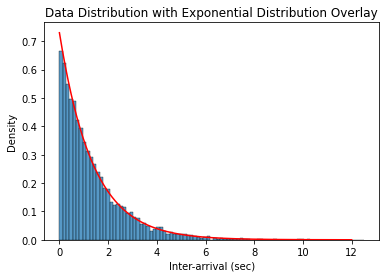

In [42]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="Inter-arrival (sec)", ax=ax, stat='density')

# overlay exponential function
x = np.linspace(0, 12, 1000)
y = (1/beta) * np.exp(-x/beta)
sns.lineplot(x=x, y=y, ax=ax, color='red')

plt.title('Data Distribution with Exponential Distribution Overlay')

In [59]:
df["velocity (km/s)"].describe()
mu = 0.033353
std = 0.002505 # this is sample std already
min = 0.024006
max = 0.042084

<AxesSubplot:xlabel='velocity (km/s)', ylabel='Density'>

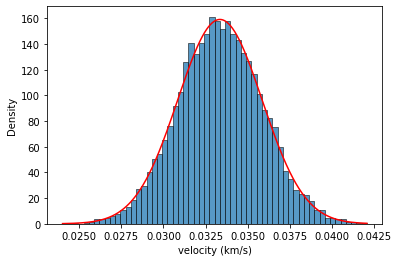

In [60]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="velocity (km/s)", ax=ax, stat='density')

# overlay exponential function
x = np.linspace(min, max, 1000)
y = 1/(std*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mu)/std) ** 2)
sns.lineplot(x=x, y=y, ax=ax, color='red')

In [55]:
df["Call duration (sec)"].describe()
beta = 109.835901

Text(0.5, 1.0, 'Data Distribution with Exponential Distribution Overlay')

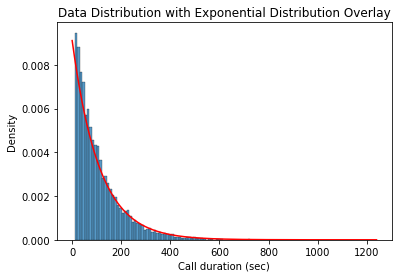

In [85]:
fig, ax = plt.subplots()

# overlay exponential function
x = np.linspace(0, 1240, 1000)
y = (1/beta) * np.exp(-x/beta)
sns.lineplot(x=x, y=y, ax=ax, color='red')

sns.histplot(data=df, x="Call duration (sec)", ax=ax, stat='density', cumulative=False)

plt.title('Data Distribution with Exponential Distribution Overlay')

In [65]:
df["Base station "].describe()

count    10000.00000
mean        10.54220
std          5.78662
min          1.00000
25%          6.00000
50%         11.00000
75%         16.00000
max         20.00000
Name: Base station , dtype: float64

Text(0.5, 1.0, 'Base Station Distributions')

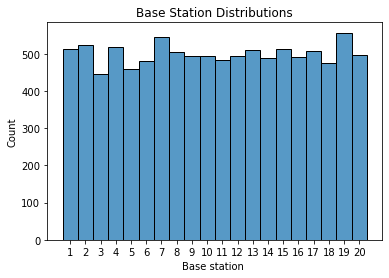

In [96]:
fig, ax = plt.subplots()

g = sns.histplot(data=df, x="Base station ", ax=ax, bins=20, discrete=True)

g.set_xticks(range(1, 21)) # <--- set the ticks first
g.set_xticklabels([str(i+1) for i in range(20)])

g.set_title('Base Station Distributions')